In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

# 1. Implemente diferentes funções em Python, usando o NumPy, para calcular: 

## a) Acurácia

In [2]:
def accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.diagonal(cm)) / np.sum(cm)

## b) Precisão

In [3]:
def precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(
            [cm[i,i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) != 0 else 0 for i in range(len(cm))] * np.sum(cm, axis=1)
        ) / np.sum(cm)

## c) Recall

In [4]:
def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(
            [cm[i,i] / np.sum(cm.T[:, i]) if np.sum(cm.T[:, i]) != 0 else 0 for i in range(len(cm))] * np.sum(cm, axis=1)
        ) / np.sum(cm)

## d) F1-Measure

In [5]:
def f1_measure(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    prec = []
    rec = []
    for i in range(len(cm)):
        prec.append(cm[i,i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) != 0 else 1)
        rec.append(cm[i,i] / np.sum(cm.T[:, i]) if np.sum(cm.T[:, i]) != 0 else 1)
    prec = np.array(prec)
    rec = np.array(rec)
    denom = prec + rec
    denom[denom == 0.] = 1
    return np.sum(2 * prec * rec * np.sum(cm, axis=1) / denom) / np.sum(cm)

## e) MAE

In [6]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

## f) RMSE

In [7]:
def rmse(y_true, y_pred, squared=False):
    mae = np.mean(np.abs(y_pred - y_true)**2)
    if squared:
        return mae
    return np.sqrt(mae)

# 2. Calcule Acurácia, Precisão, Recall e F1-Measure para sua solução da questão 2 da Lista 04. Caso não tenha feito a questão 2 da Lista 04 terá que fazê-la agora.

In [8]:
df = pd.read_csv("winequality-white.csv", sep=";")

## 2.1. Exiba a quantidade de amostras existente em cada classe de vinho, onde as classes são representadas por valores inteiros entre 0 e 10.

Text(0, 0.5, 'Quantidade')

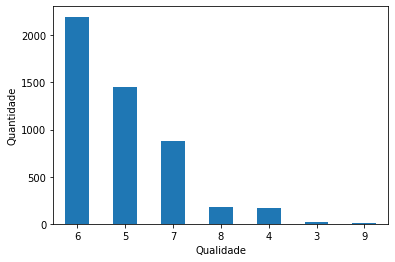

In [9]:
df['quality'].value_counts().plot.bar(rot=0)
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

## 2.2. Separe 70% dos dados para treino (conjunto de treino) e 30% dos dados para teste (conjunto de teste).

In [10]:
X = df.drop(columns=['quality'], axis=1)
y = df['quality']

In [11]:
X_minMax = MinMaxScaler().fit_transform(X) 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_minMax, y, train_size=0.7, random_state=42)

## 2.3. Crie diferentes modelos de classificação de vinho usando o kNN com diferentes valores de k.

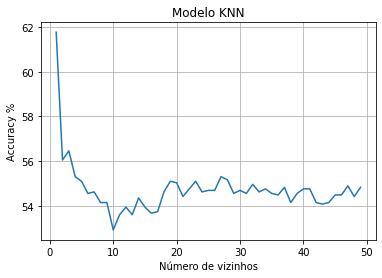

In [13]:
neighbors = np.arange(1, 50)

accs = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    accs[i] = accuracy(y_test, y_pred) * 100
    
plt.title('Modelo KNN')
plt.plot(neighbors, accs)
plt.grid()
plt.xlabel('Número de vizinhos')
plt.ylabel('Accuracy %')
plt.show()

## 2.4. Mostre os resultados de acurácia para os modelos criados. Qual o modelo com melhor acurácia?

In [15]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = model.predict(X_test)

In [17]:
# Sem sklearn
print('Accuracy={}, Precision={}, Recall={}, f1_measure={}'.format(accuracy(y_test, y_pred), 
                                                                   precision(y_test, y_pred), 
                                                                   recall(y_test, y_pred), 
                                                                   f1_measure(y_test, y_pred)))

Accuracy=0.617687074829932, Precision=0.6194461464588885, Recall=0.617687074829932, f1_measure=0.6183673752076354


In [18]:
# Sklearn
print('Accuracy={}, Precision={}, Recall={}, f1_measure={}'.format(accuracy_score(y_test, y_pred), 
                                                                   precision_score(y_test, y_pred, average='weighted'), 
                                                                   recall_score(y_test, y_pred, average='weighted'), 
                                                                   f1_score(y_test, y_pred, average='weighted')))

Accuracy=0.617687074829932, Precision=0.6194461464588885, Recall=0.617687074829932, f1_measure=0.6183673752076354


/home/ianmateus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Calcule MAE e RMSE para sua solução da questão 3.3 da Lista 05. Caso não tenha feito a questão 3.3 da Lista 05 terá que fazê-la agora.

## 3.1 Separe 70% dos dados para treino (conjunto de treino) e 30% dos dados para teste (conjunto de teste).

In [19]:
X = df.drop(columns=['quality'], axis=1).values
y = df['quality'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## 3.2. Crie um modelo de regressão de qualidade de vinho usando o kNN para k=5.

In [21]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

## 3.3. Use o modelo de regressão sobre X_test para calcular os valores preditos dos rótulos (y_pred).

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.score(X_test, y_test)

0.1508763757631555

In [24]:
# Sem sklearn
print('MAE={}, RMSE={}'.format(mae(y_test, y_pred), rmse(y_test, y_pred))) 

MAE=0.6273469387755103, RMSE=0.800696975302457


In [25]:
# Sklearn
print('MAE={}, RMSE={}'.format(mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False))) 

MAE=0.6273469387755103, RMSE=0.800696975302457
